# Task 1: Data Preparation

In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv(os.getcwd() + "/Data.csv", header=0, sep=',')

In [2]:
# Check whether the loaded data is equivalent to the data in the source CSV file
# Reloading data to ensure consistency
data_2 = pd.read_csv(os.getcwd() + "/Data.csv", header=0, sep=',')

if (data.equals(data_2)):
    print("The loaded data is equivalent to the data in the source CSV file.\n")
else:
    print("The loaded data is NOT equivalent to the data in the source CSV file.\n")

The loaded data is equivalent to the data in the source CSV file.



In [3]:
# Cleaning the dataset

In [4]:
# Check data types of loaded columns
data.dtypes

Year                               int64
Month                             object
Day                               object
Rainfall amount (millimetres)    float64
dtype: object

In [5]:
# Convert month from object to float
data['Month'] = pd.to_numeric(data['Month'], errors='coerce')

# Convert day from object to float
data['Day'] = pd.to_numeric(data['Day'], errors='coerce')

In [6]:
# Check data types of columns
data.dtypes

Year                               int64
Month                            float64
Day                              float64
Rainfall amount (millimetres)    float64
dtype: object

In [7]:
# Check for NaN values
data.isna().sum()

Year                             0
Month                            3
Day                              2
Rainfall amount (millimetres)    5
dtype: int64

In [8]:
# Drop rows with NaN values
# Confirm there are no more NaN values
data.dropna(inplace=True)
data.isna().sum()

Year                             0
Month                            0
Day                              0
Rainfall amount (millimetres)    0
dtype: int64

In [9]:
# Convert month from float into int
data['Month'] = data['Month'].astype(int)

# Convert day from float into int
data['Day'] = data['Day'].astype(int)

In [10]:
# Check data types of columns
data.dtypes

Year                               int64
Month                              int64
Day                                int64
Rainfall amount (millimetres)    float64
dtype: object

In [11]:
# Check for duplicate rows of data
data = data.drop_duplicates()

In [12]:
# Remove typo in year (should be 2017 instead of 2027)
data['Year'].replace(2027, 2017, inplace=True)

In [13]:
# Remove outlier in year 2019 which skews the data
data['Rainfall amount (millimetres)'].replace(100000, 0, inplace=True)

In [14]:
# Add data for months January 1st to June 1st in 2013 to make the data well-rounded for analysation.
# According to theBureau of Meteorology, the average total rainfall in 2013 was was 428mm.
# Since by climate and period of time 2014 is the closest data we have to 2013, we will use those dates as an
# estimate for when rainfall could have occurred in 2013. We will substitute data for January 1st to June 1st where
# 2013 data is missing following the seasonal pattern of 2014 and making sure the sum of rainfall in 2013 in ABC
# City is equal to 482mm.

In [15]:
yearly_rainfall = data.groupby('Year', as_index=False)['Rainfall amount (millimetres)'].sum()
rainfall_2013 = yearly_rainfall[yearly_rainfall['Year'] == 2013]['Rainfall amount (millimetres)'].values[0]

rainfall_required = 428.0 - rainfall_2013
print("The additional rainfall required in 2013 to meet the average is:", rainfall_required)

# Retrieve the data from the first 5 months from 2014
jan_to_may_2014 = data[(data['Year'] == 2014) & (data['Month'] < 6)]

# Retrieve the data for June 1st from 2014
june_1st_2014 = data[(data['Year'] == 2014) & (data['Month'] == 6) & (data['Day'] == 1)]

# Concatenate the data
first_months_of_2014 = pd.concat([jan_to_may_2014, june_1st_2014], ignore_index=True)

rainfall_2014 = first_months_of_2014.groupby('Year', as_index=False)['Rainfall amount (millimetres)'].sum()['Rainfall amount (millimetres)'].values[0]
print("The rainfall in the first 6 months of 2014 was", rainfall_2014)

# Creating sample data for January 1st 2013 to June 1st 2013

# Calculate the value we need to scale the rainfall down by to get to a sum of 47.8 for the first months of 2013
scale_down_value = rainfall_required / rainfall_2014

# Scale the values down and round to one decimal place to match the format of data in Rainfall amount (millimetres)
first_months_of_2014['Rainfall amount (millimetres)'] = first_months_of_2014['Rainfall amount (millimetres)'] * scale_down_value
first_months_of_2014['Rainfall amount (millimetres)'] = first_months_of_2014['Rainfall amount (millimetres)'].round(1)

# Change the year to 2013
first_months_of_2014['Year'] = 2013
rainfall_2013_new = first_months_of_2014.groupby('Year', as_index=False)['Rainfall amount (millimetres)'].sum()['Rainfall amount (millimetres)'].values[0]
print("The rainfall in the first 6 months of 2013 will be", rainfall_2013_new)

# Concatenate the data to main dataframe
data = pd.concat([first_months_of_2014, data], ignore_index=True)

The additional rainfall required in 2013 to meet the average is: 47.80000000000001
The rainfall in the first 6 months of 2014 was 163.2
The rainfall in the first 6 months of 2013 will be 47.7


In [16]:
"""
Write dataframe object into a csv file
XXXXX.to_csv('XXXXX.csv', index=False)
Please replace XXXXX with your dataframe variable and name of the csv file.
"""
# Write dataframe object into a csv file
data.to_csv('cleaned_version.csv', index=False)

# Task 2: Data Exploration

In [17]:
# Retrieve the clean dataset
clean_data = pd.read_csv(os.getcwd() + "/cleaned_version.csv", header=0, sep=',')

## Task 2.1 

In [18]:
# Prepare and convert the data in 2014 as a pandas DataFrame with rows as the days 
# in a month and columns as the months in a year

In [19]:
# Getting all data where year = 2014
data_2014 = clean_data[clean_data['Year'] == 2014]

In [20]:
# Alter dataframe so that rows are the days and the columns are each month in the year
data_2014_altered = data_2014.pivot_table(index='Day', columns='Month', values='Rainfall amount (millimetres)', aggfunc='first')

In [21]:
# Get the max of each column (month) to get the highest daily rainfall in each month
highest_daily_rainfall = data_2014_altered.max()
print(highest_daily_rainfall)

Month
1      5.4
2     10.4
3      6.6
4     18.2
5     11.0
6      7.0
7      5.0
8     10.6
9     11.6
10    22.4
11    36.6
12    14.8
dtype: float64


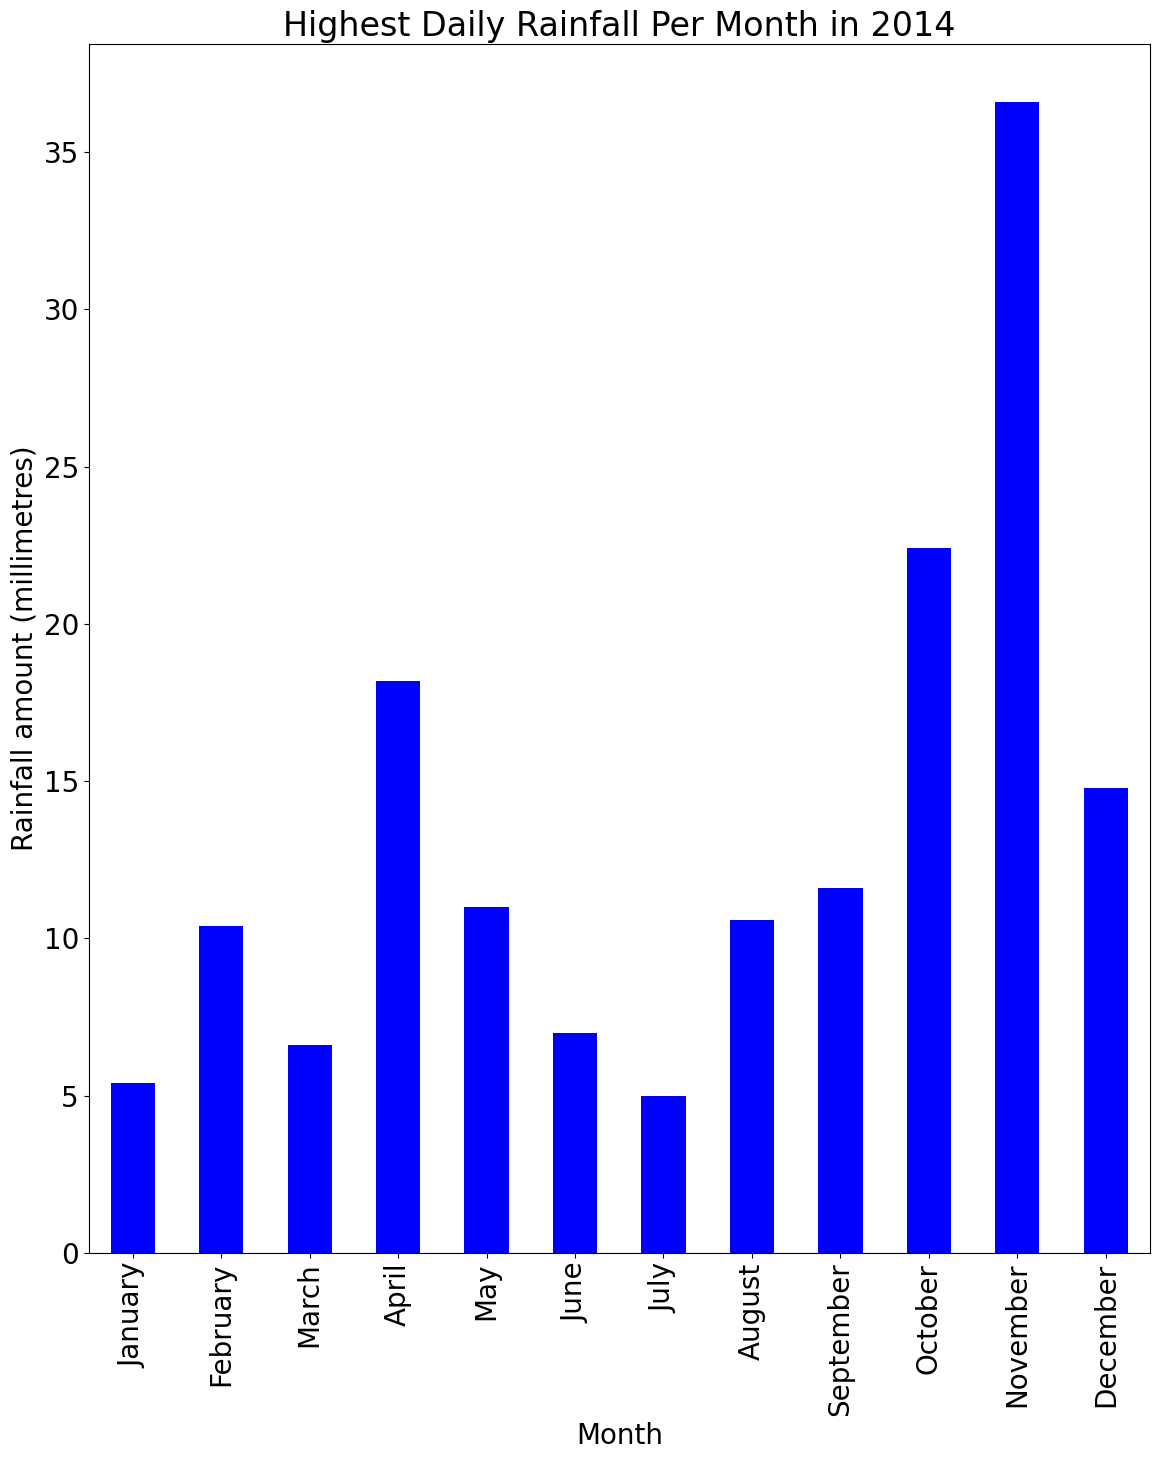

In [22]:
# Plot the monthly max rainfall for 2014 in a bar chart
plt.figure(figsize=(12, 15))
plt.rcParams.update({'font.size': 20})
highest_daily_rainfall.plot(kind='bar', color='blue')
plt.title('Highest Daily Rainfall Per Month in 2014')
plt.xlabel('Month')
# Change x-axis labels from numbered months (1-12) to name of the month to make the visualization more meaningful
plt.xticks(range(0, 12), ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
                          'September', 'October', 'November', 'December'])
plt.ylabel('Rainfall amount (millimetres)')
plt.tight_layout()
plt.show()

## Task 2.2 

In [23]:
# Explore the data between 2015 and 2017, and analyse them on both a yearly and
# monthly basis with visualizations.

In [24]:
# Getting the data between 2015 and 2017
data_btwn_2015_to_2017 = clean_data[(clean_data['Year'] >= 2015) & (clean_data['Year'] <= 2017)]

In [25]:
# Yearly Analysis
yearly_analysis = data_btwn_2015_to_2017.groupby('Year')['Rainfall amount (millimetres)'].sum()
print(yearly_analysis)

Year
2015    439.2
2016    599.6
2017    586.6
Name: Rainfall amount (millimetres), dtype: float64


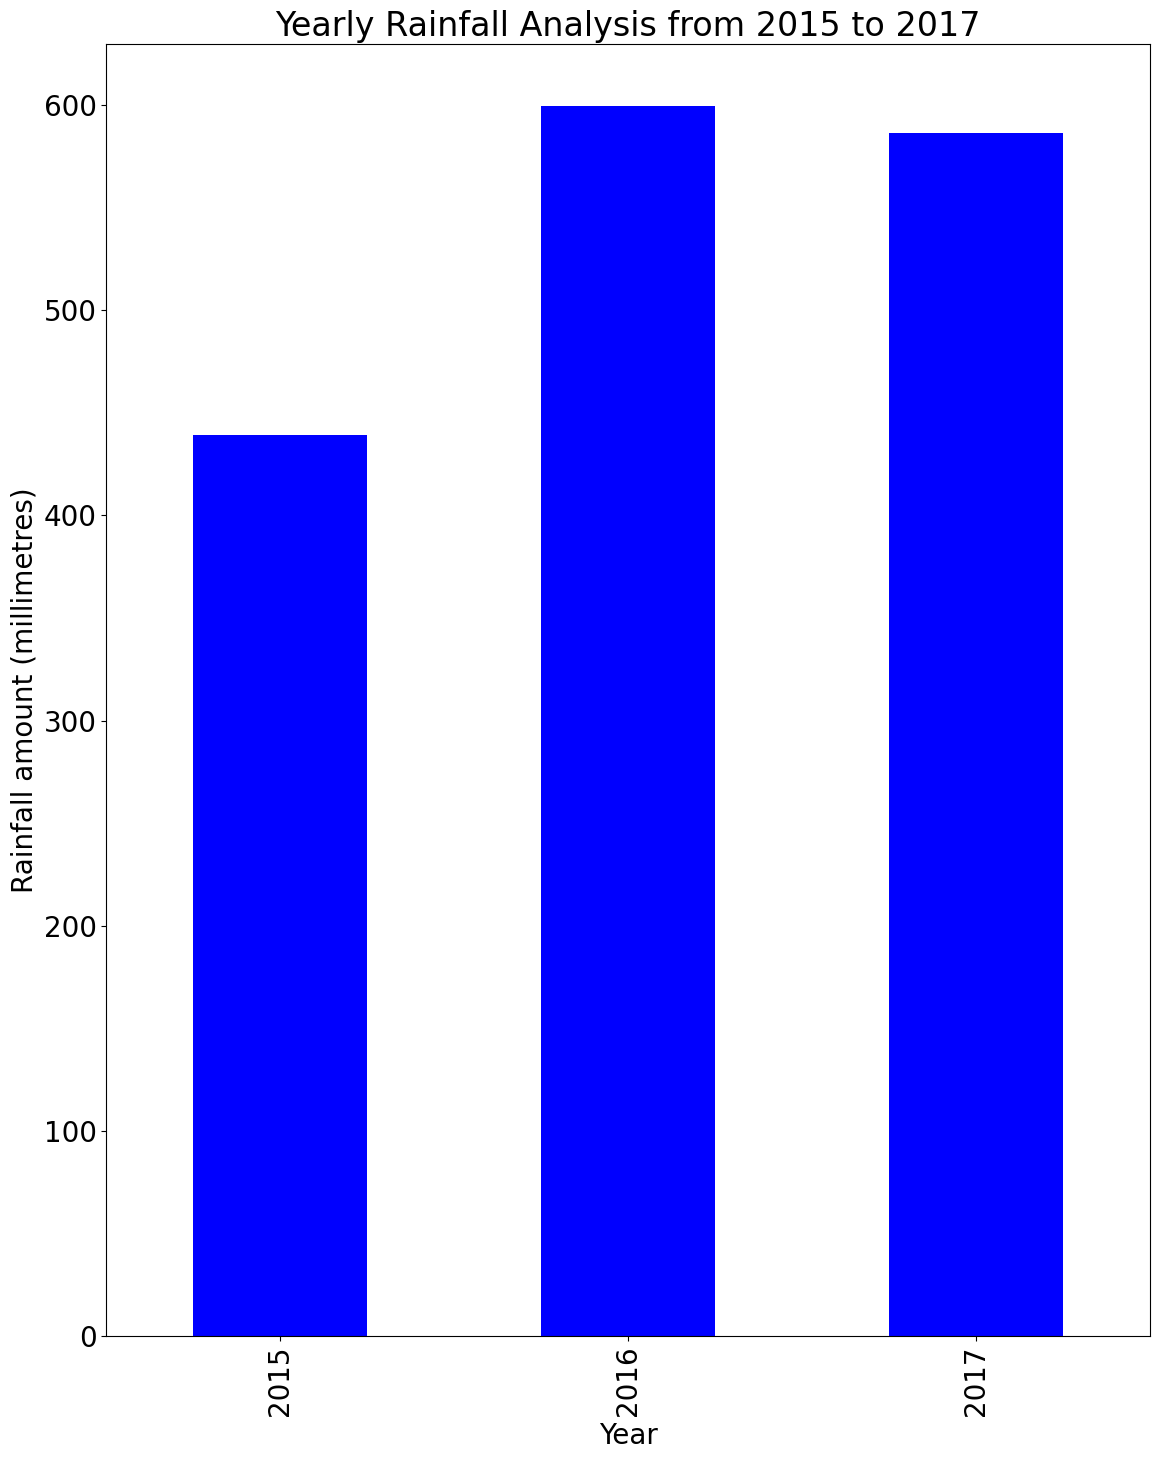

In [26]:
# Plot the yearly analysis data onto a bar graph
plt.figure(figsize=(12, 15))
yearly_analysis.plot(kind='bar', color='blue')
plt.title('Yearly Rainfall Analysis from 2015 to 2017')
plt.xlabel('Year')
plt.ylabel('Rainfall amount (millimetres)')
plt.tight_layout()
plt.show()

In [27]:
# Monthly Analysis
monthly_analysis = data_btwn_2015_to_2017.groupby('Month')['Rainfall amount (millimetres)'].sum()
print(monthly_analysis)

Month
1     127.0
2      87.0
3      85.0
4     193.4
5     119.6
6      99.0
7     152.6
8     153.2
9     157.4
10    116.0
11    120.4
12    214.8
Name: Rainfall amount (millimetres), dtype: float64


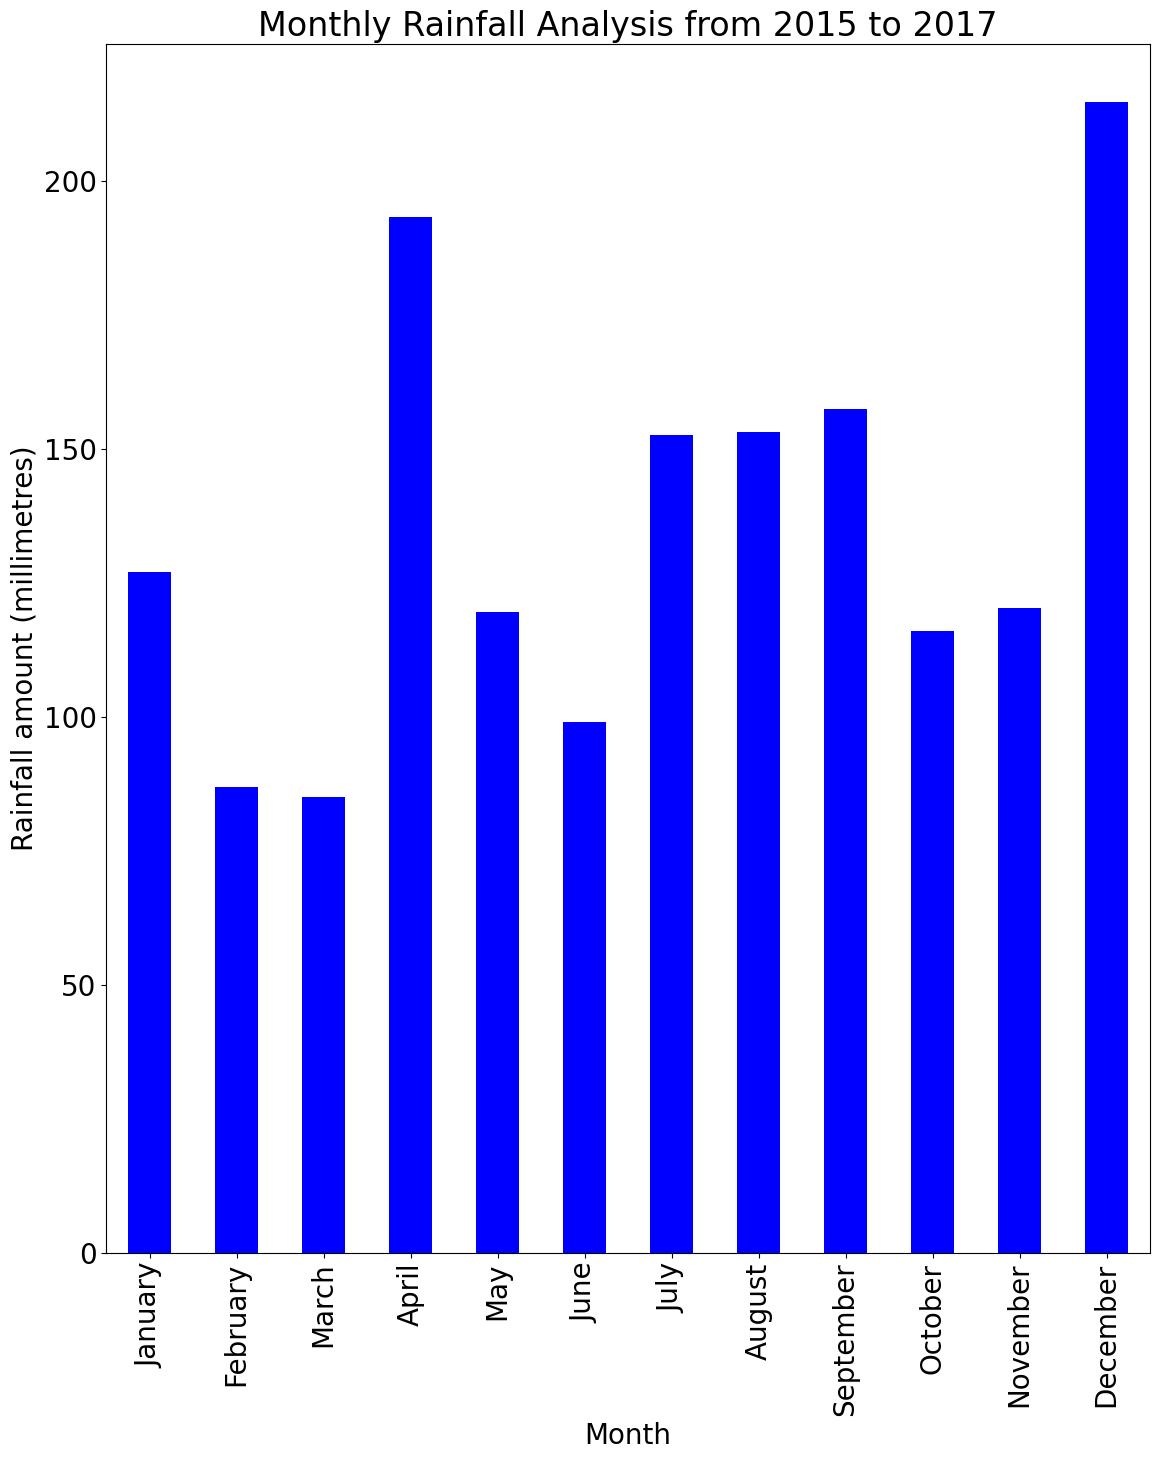

In [28]:
# Plot the monthly analysis data onto a bar graph
plt.figure(figsize=(12, 15))
monthly_analysis.plot(kind='bar', color='blue')
plt.title('Monthly Rainfall Analysis from 2015 to 2017')
plt.xlabel('Month')
plt.ylabel('Rainfall amount (millimetres)')

# Change x-axis labels from numbered months (1-12) to name of the month to make the visualization more meaningful
plt.xticks(range(0, 12), ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
                          'September', 'October', 'November', 'December'])
plt.tight_layout()
plt.show()

## Task 2.3 

In [29]:
# Explore the data, and find the top 3 years with the highest rainfall amount and the
# top 3 years with the lowest rainfall amount, then compare them.

In [30]:
# Grouping data by yearly rainfall amount and making it into a dataframe to be used later for visualization
yearly_rainfall = clean_data.groupby('Year', as_index=False)['Rainfall amount (millimetres)'].sum()
yearly_rainfall

,Year,Rainfall amount (millimetres)
0,2013,427.9
1,2014,432.0
2,2015,439.2
3,2016,599.6
4,2017,586.6
5,2018,514.4
6,2019,364.4
7,2020,786.8
8,2021,682.6
9,2022,699.4


In [31]:
# Sort the rainfall by years in descending order
yearly_rainfall = yearly_rainfall.sort_values(by='Rainfall amount (millimetres)', ascending=False)
yearly_rainfall

,Year,Rainfall amount (millimetres)
7,2020,786.8
9,2022,699.4
8,2021,682.6
3,2016,599.6
4,2017,586.6
10,2023,575.4
5,2018,514.4
2,2015,439.2
1,2014,432.0
0,2013,427.9


In [32]:
# Retrieve the top 3 years with the highest rainfall amount
highest_rainfall_years = yearly_rainfall.head(3)
print("The top 3 years with the highest recorded rainfall amount (millimetres) are the following:")
print(highest_rainfall_years)

The top 3 years with the highest recorded rainfall amount (millimetres) are the following:
   Year  Rainfall amount (millimetres)
7  2020                          786.8
9  2022                          699.4
8  2021                          682.6


In [33]:
# Retrieve the top 3 years with the lowest rainfall amount
lowest_rainfall_years = yearly_rainfall.tail(3)
print("The top 3 years with the lowest recorded rainfall amount (millimetres) are the following:")
print(lowest_rainfall_years)

The top 3 years with the lowest recorded rainfall amount (millimetres) are the following:
   Year  Rainfall amount (millimetres)
1  2014                          432.0
0  2013                          427.9
6  2019                          364.4


In [34]:
# Comparing both the top 3 years with the highest rainfall with the top 3 years with the lowest rainfall, it is
# evident that the range of rainfall sits between 432.0mm to 786.8mm, indicating that in ABC City there has always
# been some rainfall. The highest rainfall amounts have been recorded in years 2020-2022 in ABC City,
# meanwhile the lowest rainfall amounts have been recorded in past years such as 2013-2014 and 2019.

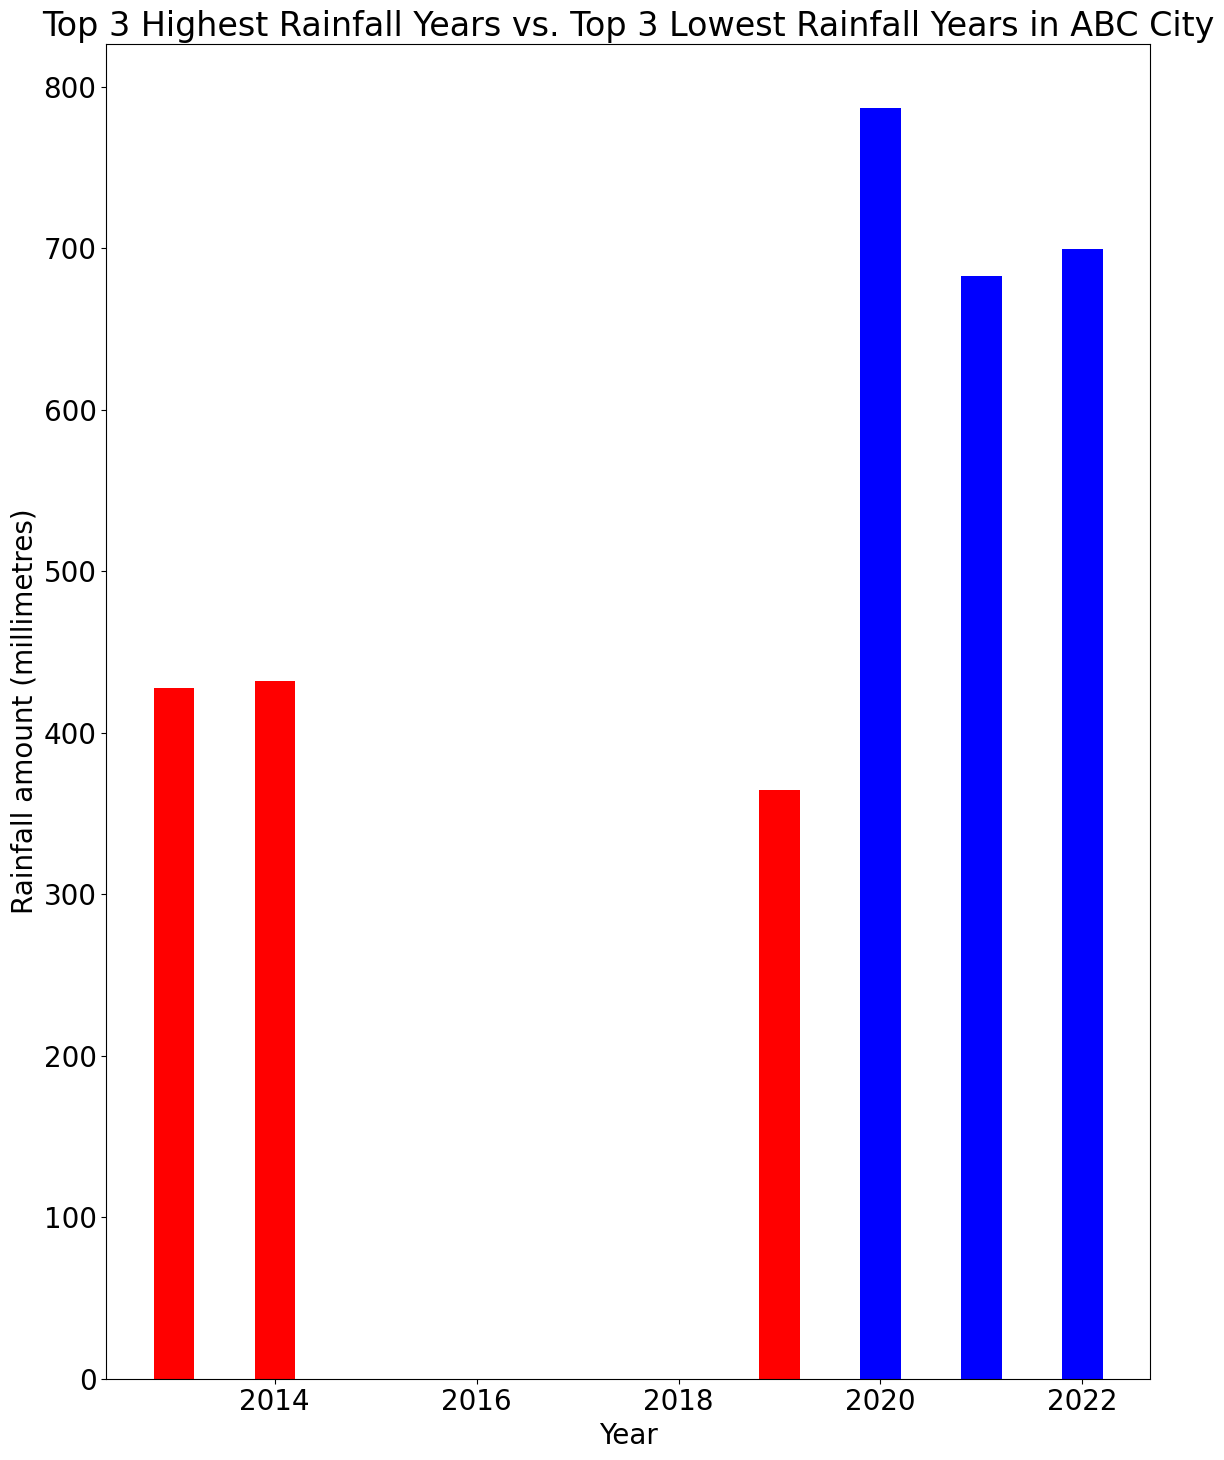

In [35]:
# Plot the top 3 years with highest rainfall vs. top 3 years with lowest rainfall
plt.figure(figsize=(12, 15))
plt.bar(highest_rainfall_years['Year'], highest_rainfall_years['Rainfall amount (millimetres)'], width=0.4, color='blue', label='Highest Rainfall Years')
plt.bar(lowest_rainfall_years['Year'], lowest_rainfall_years['Rainfall amount (millimetres)'], width=0.4, color='red', label='Lowest Rainfall Years')

plt.title('Top 3 Highest Rainfall Years vs. Top 3 Lowest Rainfall Years in ABC City')
plt.xlabel('Year')
plt.ylabel('Rainfall amount (millimetres)')
plt.tight_layout()
plt.show()

## Task 2.4 

In [36]:
# Explore the changes of rainfall in ABC City in the last 10 years

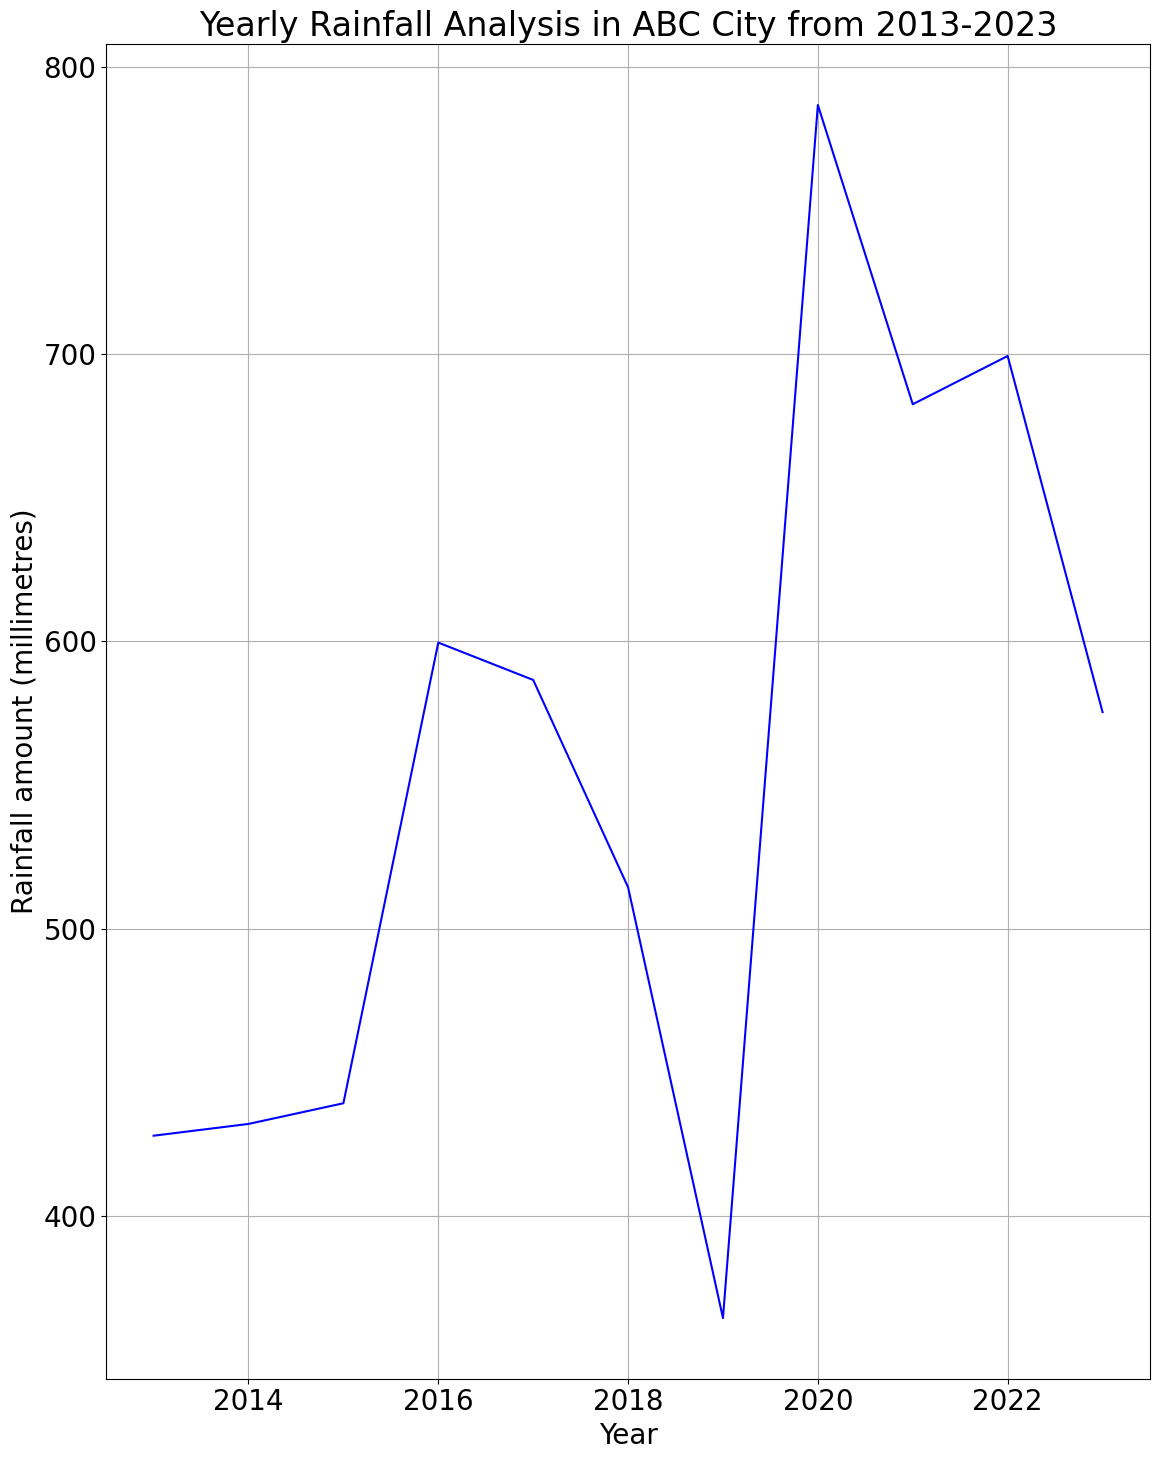

In [37]:
# Sort the data by year in ascending order
yearly_rainfall = yearly_rainfall.sort_values(by='Year', ascending=True)

# Plot the changes of rainfall in ABC City in the last 10 years
plt.figure(figsize=(12, 15))
plt.plot(yearly_rainfall['Year'], yearly_rainfall['Rainfall amount (millimetres)'], color='blue')
plt.title('Yearly Rainfall Analysis in ABC City from 2013-2023')
plt.xlabel('Year')
plt.ylabel('Rainfall amount (millimetres)')
plt.grid(True)
plt.tight_layout()
plt.show()